In [2]:
import numpy as np  # Imports the NumPy library for numerical operations and array handling.
import pandas as pd  # Imports the pandas library for data manipulation and analysis.
import matplotlib.pyplot as plt  # Imports Matplotlib's pyplot for creating static visualizations.
import seaborn as sns  # Imports Seaborn for statistical data visualization, built on top of Matplotlib.
import plotly.express as px  # Imports Plotly Express for easy-to-use interactive visualizations.
import missingno as msno  # Imports Missingno for visualizing missing data.
from sklearn.pipeline import Pipeline  # Imports Pipeline for creating machine learning workflows.
from sklearn.linear_model import LogisticRegression  # Imports LogisticRegression for classification tasks.
from sklearn.ensemble import RandomForestClassifier  # Imports RandomForestClassifier for ensemble-based classification.
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay  # Imports metrics for evaluating model performance.
from sklearn.model_selection import train_test_split  # Imports function to split data into training and testing sets.
from sklearn.experimental import enable_iterative_imputer  # Enables the experimental IterativeImputer in scikit-learn.
from sklearn.impute import IterativeImputer, SimpleImputer  # Imports imputers to handle missing data.
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # Imports tools for data preprocessing (scaling and encoding).
from sklearn.compose import ColumnTransformer  # Imports ColumnTransformer for applying different preprocessing steps to different columns.
from sklearn.model_selection import GridSearchCV  # Imports GridSearchCV for hyperparameter tuning.
from xgboost import XGBClassifier  # Imports XGBClassifier for gradient boosting-based classification.

import warnings
warnings.filterwarnings('ignore')  # Suppresses warnings to keep the output clean

In [3]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\hitec\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\hitec\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\hitec\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [95]:
pd.set_option('display.max_columns',None)

In [96]:
df = pd.read_excel(r"C:\Users\hitec\Downloads\Shivanekapoor details\ecom\E Commerce Dataset.xlsx",sheet_name="E Comm")

In [97]:
df.head()


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [98]:
df.shape

(5630, 20)

In [99]:
df.describe().info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   8 non-null      float64
 1   Churn                        8 non-null      float64
 2   Tenure                       8 non-null      float64
 3   CityTier                     8 non-null      float64
 4   WarehouseToHome              8 non-null      float64
 5   HourSpendOnApp               8 non-null      float64
 6   NumberOfDeviceRegistered     8 non-null      float64
 7   SatisfactionScore            8 non-null      float64
 8   NumberOfAddress              8 non-null      float64
 9   Complain                     8 non-null      float64
 10  OrderAmountHikeFromlastYear  8 non-null      float64
 11  CouponUsed                   8 non-null      float64
 12  OrderCount                   8 non-null      float64
 13  DaySinceLastOrder      

In [100]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [101]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [102]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [103]:
df.duplicated().sum()

0

In [104]:
df.nunique()

CustomerID                     5630
Churn                             2
Tenure                           36
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                 2586
dtype: int64

In [105]:
df.drop(columns="CustomerID", inplace=True)

In [106]:
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [107]:
df.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [108]:
# Change column names to lowercase
df.columns = [col.lower() for col in df.columns]

In [109]:
df.columns

Index(['churn', 'tenure', 'preferredlogindevice', 'citytier',
       'warehousetohome', 'preferredpaymentmode', 'gender', 'hourspendonapp',
       'numberofdeviceregistered', 'preferedordercat', 'satisfactionscore',
       'maritalstatus', 'numberofaddress', 'complain',
       'orderamounthikefromlastyear', 'couponused', 'ordercount',
       'daysincelastorder', 'cashbackamount'],
      dtype='object')

In [110]:
# segment the columns of the DataFrame into two lists based on the number of unique values each column contains.
count_col = []
hist_col = []
for column in df.columns:
    unique_value = df[column].nunique()
    if unique_value <= 20:
        count_col.append(column)
    else:
        hist_col.append(column)  

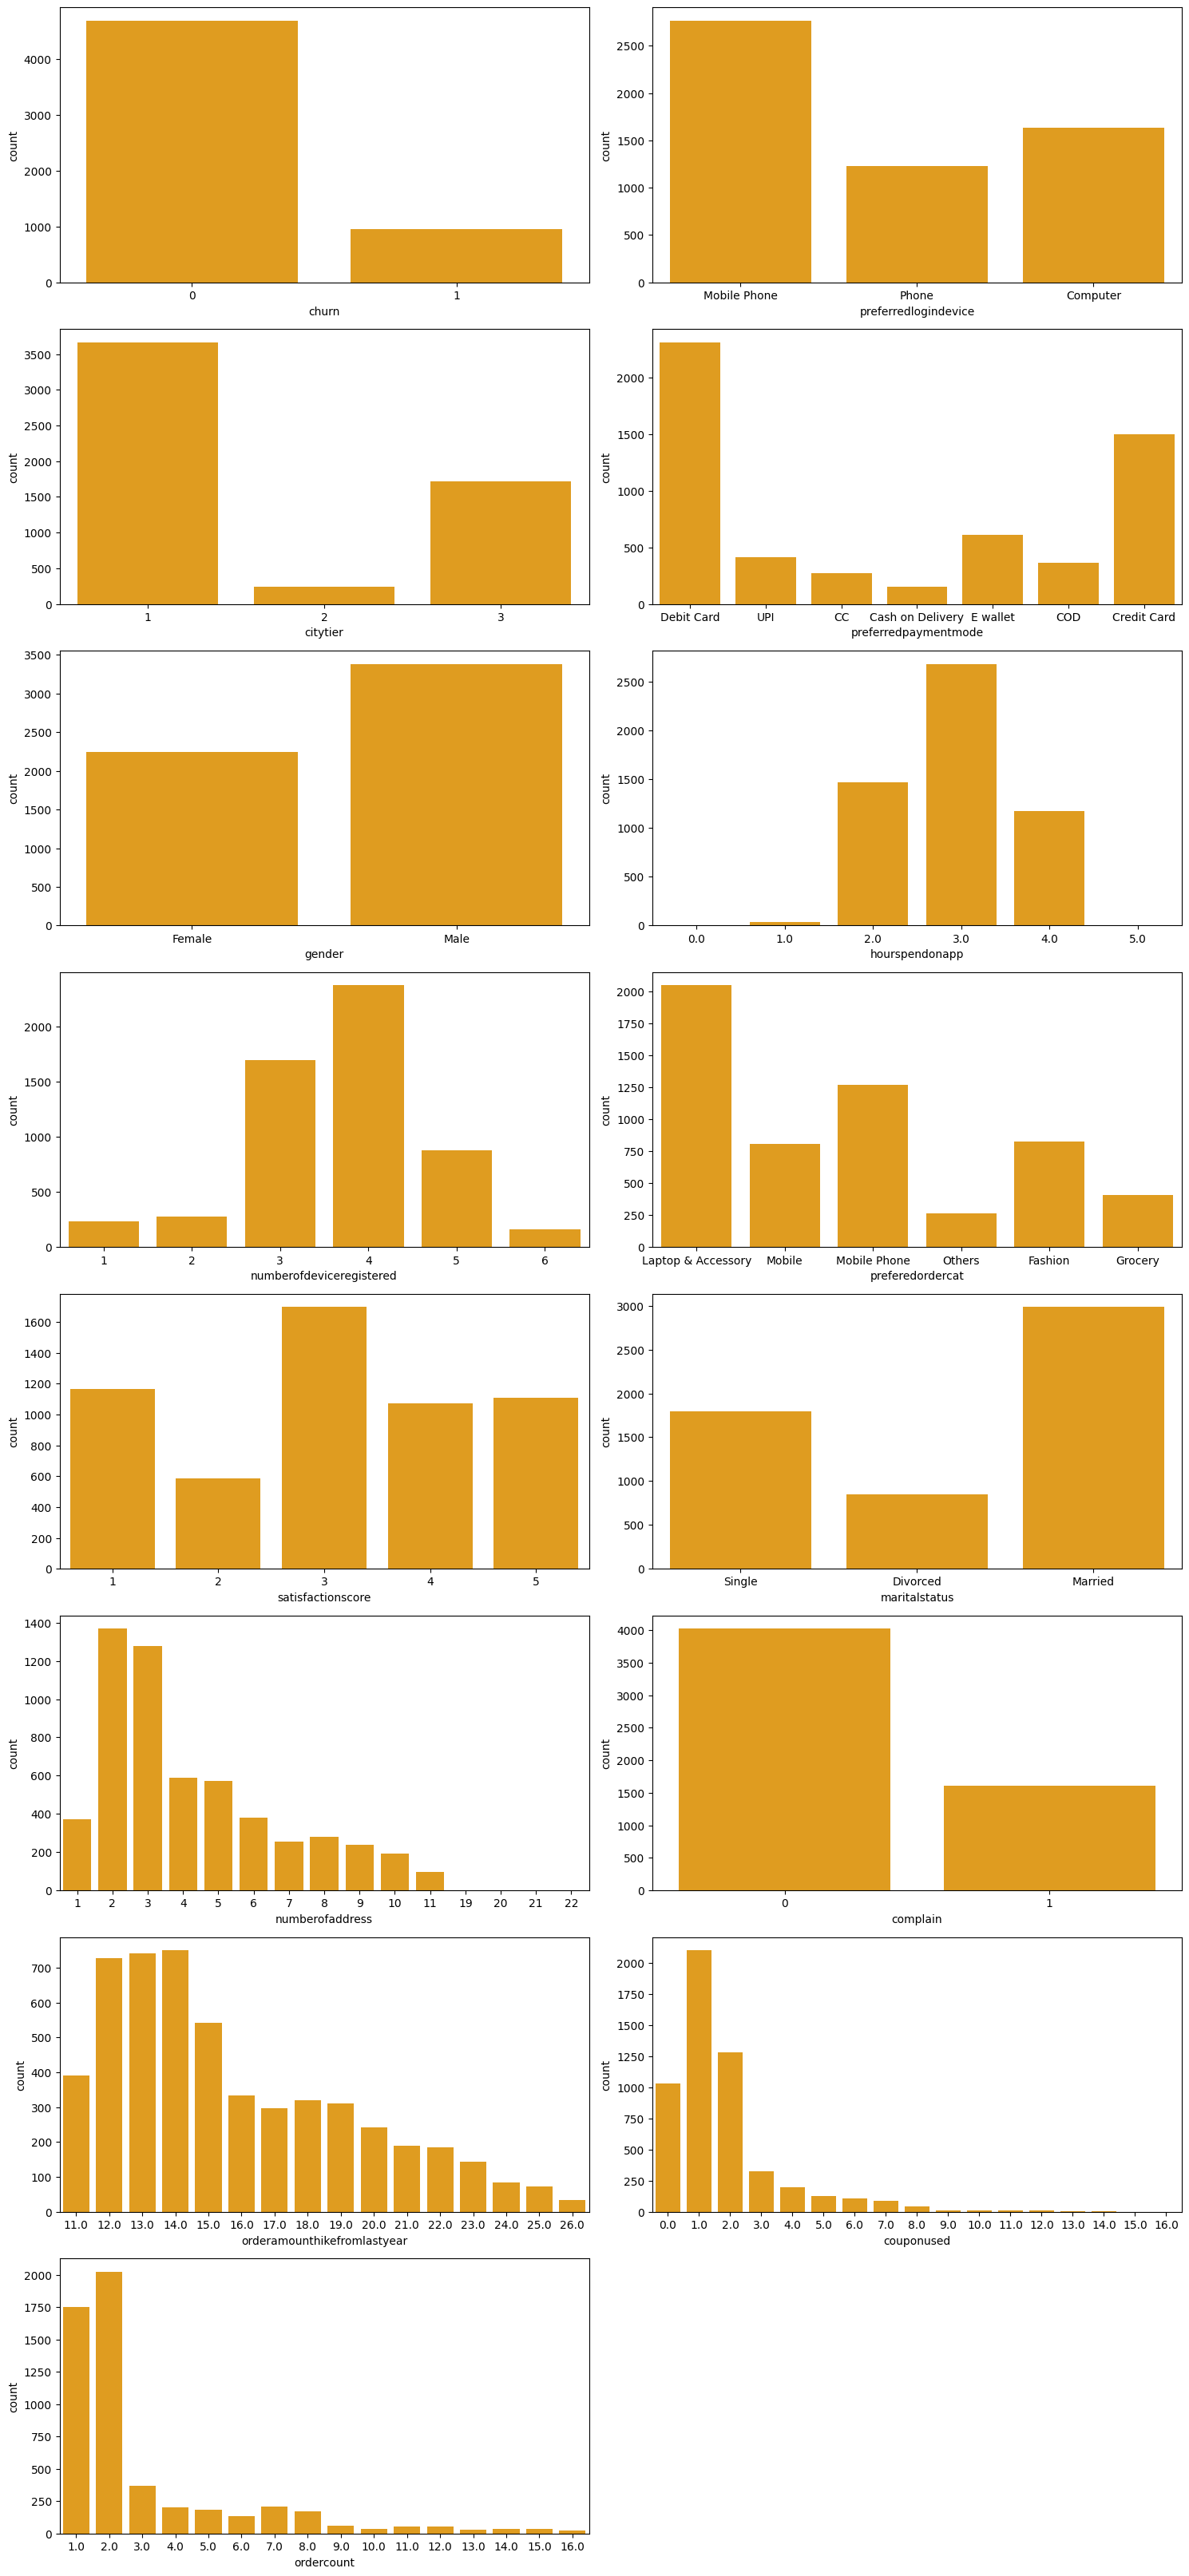

In [112]:
#Countplots of categorical columns
plt.figure(figsize=(15,40))
plot_num = 1
for col in count_col:
    plt.subplot(10,2,plot_num)
    sns.countplot(data=df, x=col,color="orange")
    plot_num += 1
    plt.tight_layout()

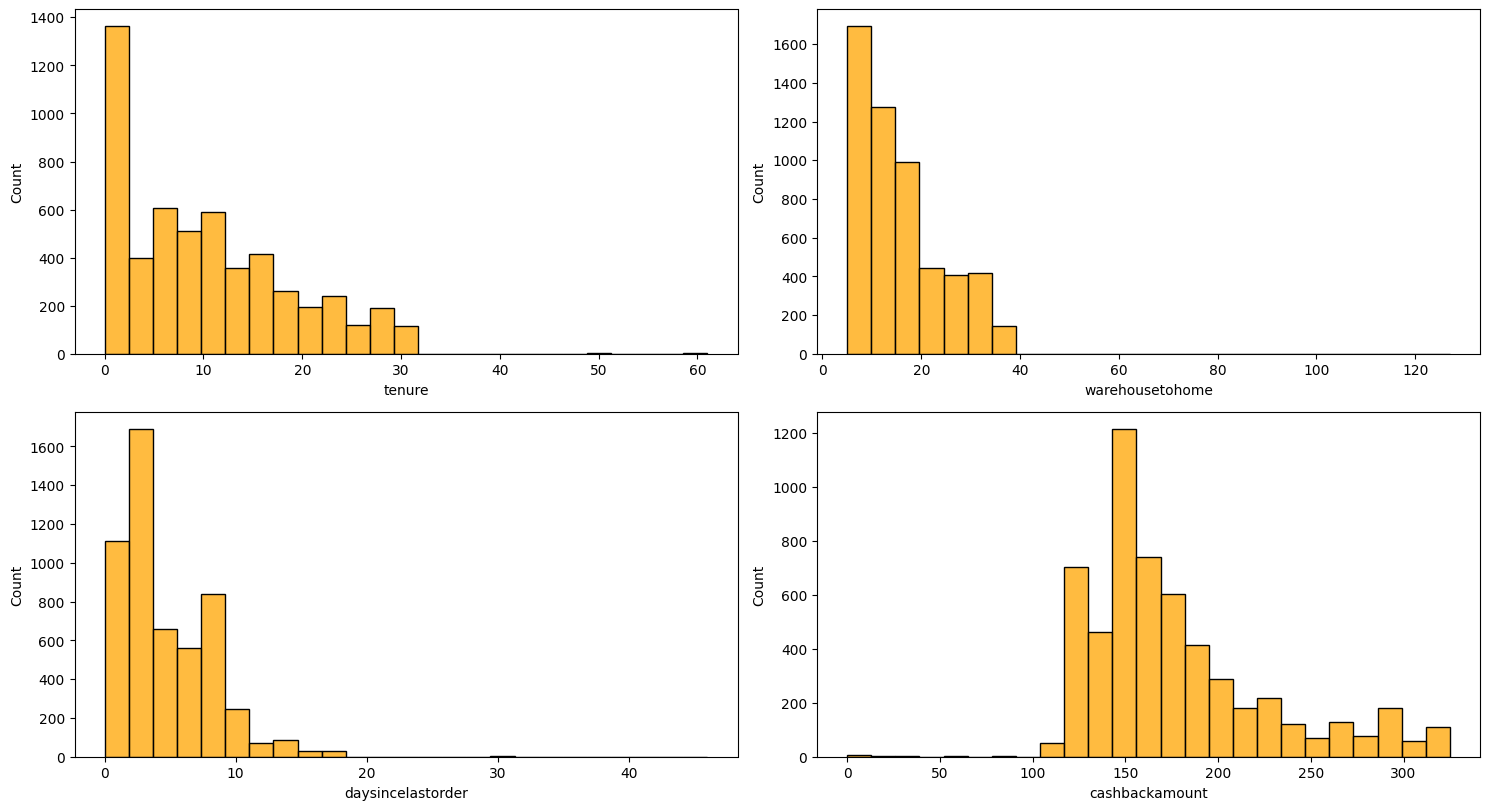

In [113]:
#Histograms of numerical columns
plt.figure(figsize=(15,40))
plot_num = 1
for col in hist_col:
    plt.subplot(10,2,plot_num)
    sns.histplot(data=df, x=col,bins=25,color="orange")
    plot_num += 1
    plt.tight_layout()

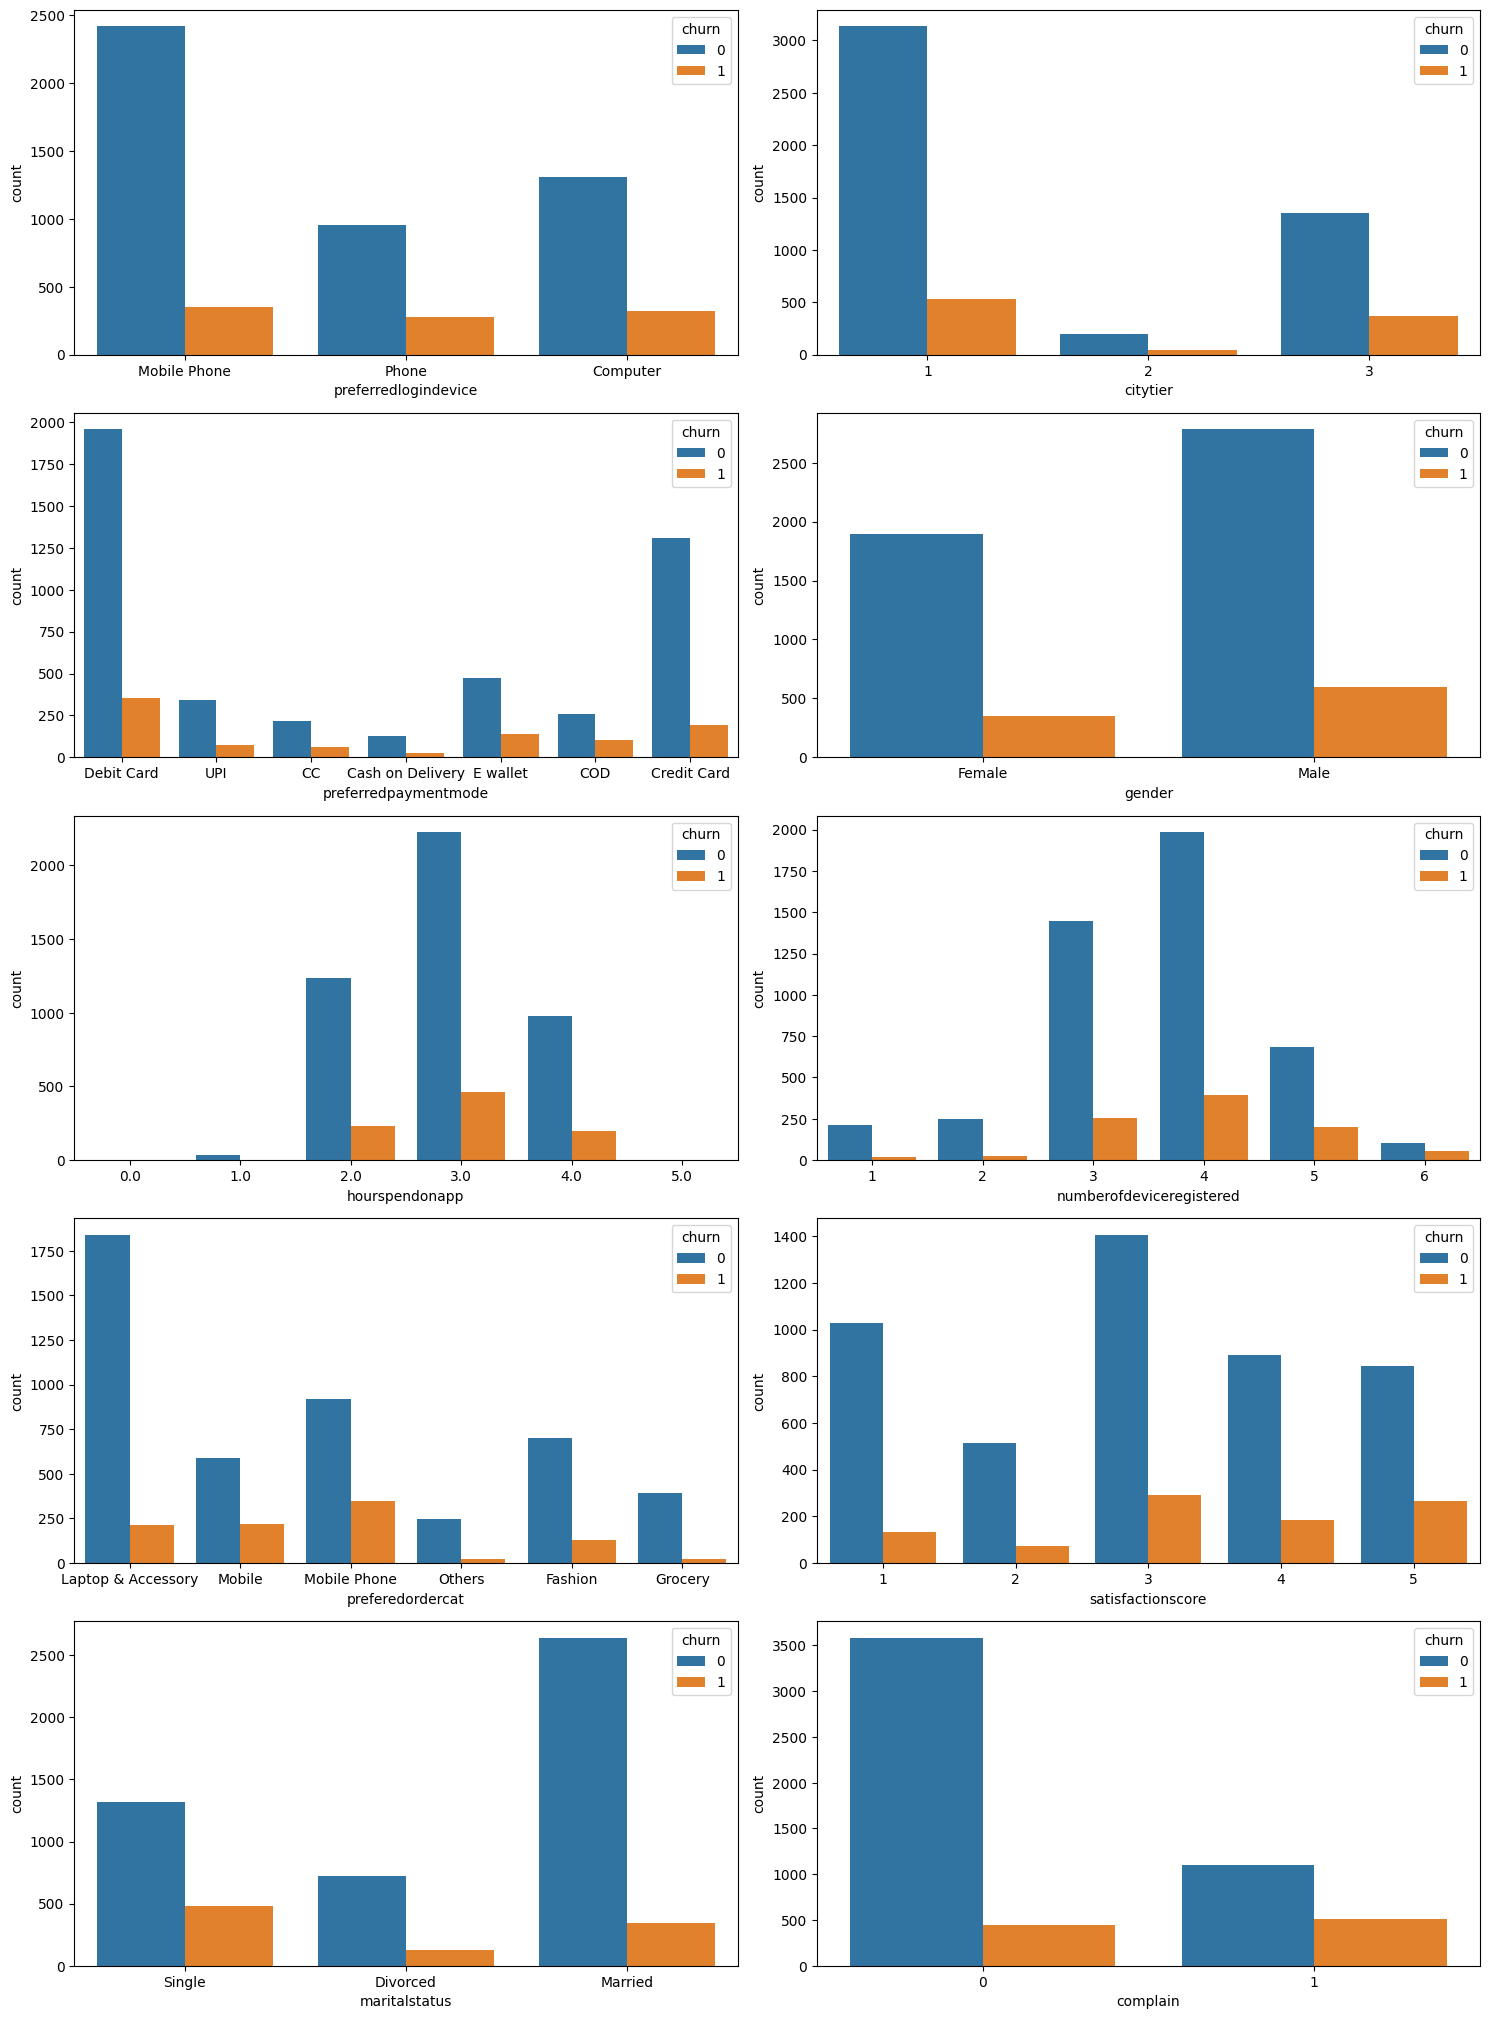

In [114]:
#Plot the Churn distribution for each categorical variable
plt.figure(figsize=(15,40))
plot_num = 1
for col in count_col:
    if df[col].nunique() <= 8 and col != "churn":
        plt.subplot(10,2,plot_num)
        sns.countplot(data=df, x=col, hue="churn")
        plot_num += 1
        plt.tight_layout()

In [115]:
from sklearn.impute import SimpleImputer  # Imports SimpleImputer for handling missing data with basic strategies.
from sklearn.experimental import enable_iterative_imputer  # Enables the experimental IterativeImputer in scikit-learn.
from sklearn.impute import IterativeImputer  # Imports IterativeImputer for advanced imputation techniques using iterative models.
from sklearn.ensemble import RandomForestRegressor  # Imports RandomForestRegressor for regression tasks using ensemble methods.
import pandas as pd  # Imports the pandas library for data manipulation and analysis.

def fill_missing_values(df, random_state=None):
    # Step 1: Identify numeric and categorical columns
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()  # Include both string and category data

    # Step 2: Impute numeric columns
    numeric_imputer = SimpleImputer(strategy='mean')
    df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])

    # Step 3: Handle categorical columns
    for col in categorical_columns:
        if df[col].dtype == 'object':
            # Convert categorical column to one-hot encoded representation
            encoded_cols = pd.get_dummies(df[col], prefix=col)
            # Concatenate one-hot encoded columns
            df = pd.concat([df.drop(col, axis=1), encoded_cols], axis=1)

    # Step 4: Random Forest Iterative Imputer for the entire DataFrame
    rf_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=random_state))
    df = pd.DataFrame(rf_imputer.fit_transform(df), columns=df.columns)

    return df

# Call the function to fill missing values
df = fill_missing_values(df, random_state=42)

In [123]:
df.head(20)

,churn,tenure,citytier,warehousetohome,hourspendonapp,numberofdeviceregistered,satisfactionscore,numberofaddress,complain,orderamounthikefromlastyear,couponused,ordercount,daysincelastorder,cashbackamount,preferredlogindevice_Computer,preferredlogindevice_Mobile Phone,preferredlogindevice_Phone,preferredpaymentmode_CC,preferredpaymentmode_COD,preferredpaymentmode_Cash on Delivery,preferredpaymentmode_Credit Card,preferredpaymentmode_Debit Card,preferredpaymentmode_E wallet,preferredpaymentmode_UPI,gender_Female,gender_Male,preferedordercat_Fashion,preferedordercat_Grocery,preferedordercat_Laptop & Accessory,preferedordercat_Mobile,preferedordercat_Mobile Phone,preferedordercat_Others,maritalstatus_Divorced,maritalstatus_Married,maritalstatus_Single
0,1.0,4.000000,3.0,6.0,3.000000,3.0,2.0,9.0,1.0,11.000000,1.0,1.0,5.0,159.93,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,10.189899,1.0,8.0,3.000000,4.0,3.0,7.0,1.0,15.000000,0.0,1.0,0.0,120.90,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,10.189899,1.0,30.0,2.000000,4.0,3.0,6.0,1.0,14.000000,0.0,1.0,3.0,120.28,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.000000,3.0,15.0,2.000000,4.0,5.0,8.0,0.0,23.000000,0.0,1.0,3.0,134.07,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.000000,1.0,12.0,2.931535,3.0,5.0,3.0,0.0,11.000000,1.0,1.0,3.0,129.60,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5,1.0,0.000000,1.0,22.0,3.000000,5.0,5.0,2.0,1.0,22.000000,4.0,6.0,7.0,139.19,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6,1.0,10.189899,3.0,11.0,2.000000,3.0,2.0,4.0,0.0,14.000000,0.0,1.0,0.0,120.86,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7,1.0,10.189899,1.0,6.0,3.000000,3.0,2.0,3.0,1.0,16.000000,2.0,2.0,0.0,122.93,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8,1.0,13.000000,3.0,9.0,2.931535,4.0,3.0,2.0,1.0,14.000000,0.0,1.0,2.0,126.83,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9,1.0,10.189899,1.0,31.0,2.000000,5.0,3.0,2.0,0.0,12.000000,1.0,1.0,1.0,122.93,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


building the model

Split Dataset into Training set and Test set


In [124]:
# Split model into training and test set
X = df.drop(columns=["churn"])
y = df["churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Handling the Imbalanced dataset

In [125]:
from imblearn.over_sampling import SMOTE

In [126]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\hitec\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [127]:
print('Before upsampling count of label 0 {}'.format(sum(y_train==0)))
print('Before upsampling count of label 1 {}'.format(sum(y_train==1)))

Before upsampling count of label 0 3743
Before upsampling count of label 1 761


In [128]:
sm = SMOTE(sampling_strategy=1, random_state=1)

In [129]:
X_train_s, y_train_s = sm.fit_resample(X_train, y_train.ravel())

In [130]:
print('After upsampling count of label 0 {}'.format(sum(y_train_s==0)))
print('After upsampling count of label 1 {}'.format(sum(y_train_s==1)))


After upsampling count of label 0 3743
After upsampling count of label 1 3743


Model Evaluation with Cross Validation

In [131]:
# Libraries
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

Ensemble Methods:

AdaBoostClassifier: Combines weak learners sequentially

BaggingClassifier: Reduces overfitting through bootstrap sampling

GradientBoostingClassifier: Builds models sequentially to correct errors

RandomForestClassifier: Multiple decision trees with voting

Linear Models:

LogisticRegressionCV: With built-in cross-validation for regularization

RidgeClassifierCV: Ridge regression for classification with CV

Instance-Based:

KNeighborsClassifier: Classifies based on nearest neighbors

Gradient Boosting:

XGBClassifier: Often top-performing for tabular data

In [132]:
#Initialize the models
models=[
    #Ensemble
    AdaBoostClassifier(),
    BaggingClassifier(),
    GradientBoostingClassifier(),
    RandomForestClassifier(),

    #Linear Models
    LogisticRegressionCV(),
    RidgeClassifierCV(),

    #Nearest Neighbour
    KNeighborsClassifier(),

    #XGBoost
    XGBClassifier()
]

metrics_cols = ['model_name','test_accuracy','test_precision','test_recall','test_f1']

model_name=[]
test_acuracy=[]
test_precision=[]
test_recall=[]
test_f1=[]

“Ensemble methods combine many weak learners to reduce errors, linear models fit simple equations, nearest neighbor predicts by similarity, and XGBoost is a powerful optimized boosting algorithm often best on structured data.”

XGBoost is an ensemble model based on gradient boosting. It builds multiple decision trees sequentially, where each new tree focuses on correcting the errors of the previous ones, and combines them into a strong predictor.”


“XGBoost is an optimized version of Gradient Boosting. While both build trees sequentially to correct errors, XGBoost adds regularization, parallelization, and other system optimizations, making it faster, more accurate, and better at handling large datasets.”

You’re evaluating each model on 4 metrics:

Accuracy → overall correctness

Precision → how many predicted churns were actually churns

Recall → how many actual churns you caught

F1 → harmonic mean of precision & recall (balances both)

In [133]:
# Model Evaluation

scoring = ['accuracy','precision', 'recall', 'f1']

for model in models:
    cv_results = model_selection.cross_validate(model, X, y, cv=5,
                                                scoring=scoring, return_train_score=True)
    model_name.append(model.__class__.__name__)
    test_acuracy.append(round(cv_results['test_accuracy'].mean(),3)*100)
    test_precision.append(round(cv_results['test_precision'].mean(),3)*100)
    test_recall.append(round(cv_results['test_recall'].mean(),3)*100)
    test_f1.append(round(cv_results['test_f1'].mean(),3)*100)

metrics_data = [model_name, test_acuracy, test_precision, test_recall, test_f1]
m = {n:m for n,m in zip(metrics_cols,metrics_data)}
model_metrics = pd.DataFrame(m)
model_metrics = model_metrics.sort_values('test_accuracy', ascending=False)
metrics_styled = model_metrics.style.background_gradient(subset=['test_accuracy', 'test_f1'], cmap='RdYlGn')
metrics_styled

,model_name,test_accuracy,test_precision,test_recall,test_f1
7,XGBClassifier,99.200000,98.300000,96.900000,97.600000
3,RandomForestClassifier,98.500000,99.200000,91.900000,95.400000
1,BaggingClassifier,97.900000,96.400000,90.600000,93.400000
2,GradientBoostingClassifier,91.900000,85.200000,62.800000,72.200000
4,LogisticRegressionCV,89.300000,77.400000,51.400000,61.700000
0,AdaBoostClassifier,89.000000,72.900000,55.000000,62.500000
6,KNeighborsClassifier,87.500000,70.400000,44.800000,54.800000
5,RidgeClassifierCV,87.400000,86.500000,29.700000,44.300000


In [134]:
final_model=RandomForestClassifier()
final_model.fit(X_train, y_train)
train_pred = final_model.predict(X_train)
test_pred = final_model.predict(X_test)

final_model.score(X_test, y_test)

0.9644760213143873

In [135]:
final_model1=XGBClassifier()
final_model1.fit(X_train, y_train)
train_pred = final_model1.predict(X_train)
test_pred = final_model1.predict(X_test)

final_model1.score(X_test, y_test)

0.9769094138543517

In [136]:
final_model=BaggingClassifier()
final_model.fit(X_train, y_train)
train_pred = final_model.predict(X_train)
test_pred = final_model.predict(X_test)

final_model.score(X_test, y_test)

0.9564831261101243

In [137]:
final_model=RidgeClassifierCV()
final_model.fit(X_train, y_train)
train_pred = final_model.predict(X_train)
test_pred = final_model.predict(X_test)
LogisticRegressionCV
final_model.score(X_test, y_test)

0.8712255772646537

In [138]:
final_model=LogisticRegressionCV()
final_model.fit(X_train, y_train)
train_pred = final_model.predict(X_train)
test_pred = final_model.predict(X_test)
round(final_model.score(X_test, y_test)*100,3)

89.254

Best Practice Workflow

✅ Cross-validation for model selection (what you did)

✅ Train/test split for final evaluation (what you're doing now)

🔄 Hyperparameter tuning on the chosen model

🚀 Final training on all available data for production

Feature Importance of XGBoost Model

Importance_type
‘weight’ - the number of times a feature is used to split the data across all trees.

‘gain’ - the average gain across all splits the feature is used in.

High feature importance = "This feature is really good at predicting churn, so pay attention to it!"

Feature Importance (Gain) for XGBoost


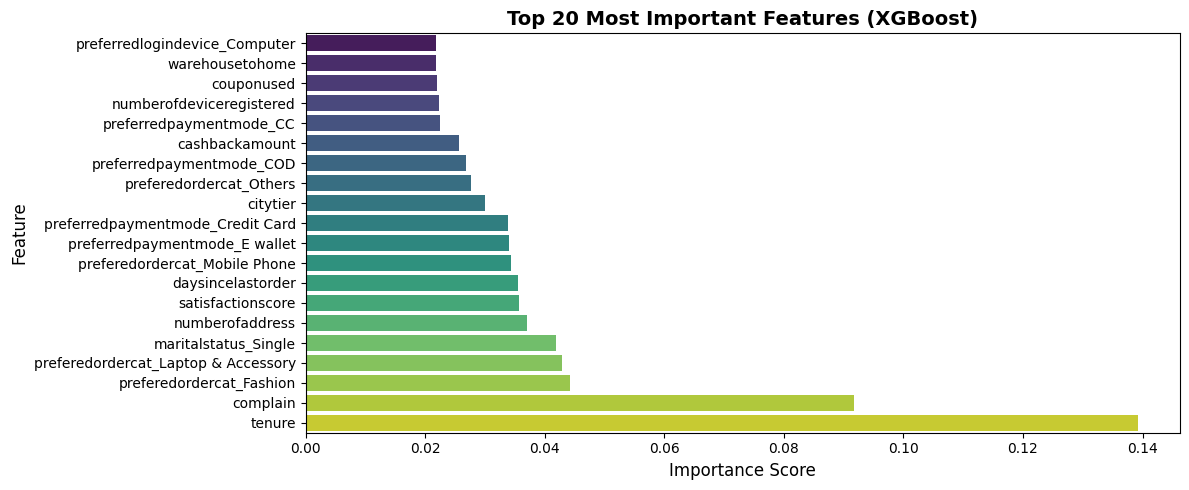

                                Feature  Importance
0                                tenure    0.139302
7                              complain    0.091822
25             preferedordercat_Fashion    0.044160
27  preferedordercat_Laptop & Accessory    0.042956
33                 maritalstatus_Single    0.041857
6                       numberofaddress    0.037125
5                     satisfactionscore    0.035669
11                    daysincelastorder    0.035585
29        preferedordercat_Mobile Phone    0.034445
21        preferredpaymentmode_E wallet    0.034096
19     preferredpaymentmode_Credit Card    0.033881
1                              citytier    0.030054
30              preferedordercat_Others    0.027610
17             preferredpaymentmode_COD    0.026915
12                       cashbackamount    0.025720
16              preferredpaymentmode_CC    0.022508
4              numberofdeviceregistered    0.022379
9                            couponused    0.021924
2           

In [139]:
print("Feature Importance (Gain) for XGBoost")

# Get feature importance from model
feature_importance = final_model1.feature_importances_
feature_names = X.columns

# Create DataFrame
data = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=True)  # sort ascending for nicer horizontal plot

# Plot top 20 features
plt.figure(figsize=(12, 5))
sns.barplot(
    x="Importance", 
    y="Feature", 
    data=data.tail(20),  # show top 20
    palette="viridis"
)
plt.title("Top 20 Most Important Features (XGBoost)", fontsize=14, weight='bold')
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()

# Print top features as table
print(data.tail(20).sort_values(by="Importance", ascending=False))

Feature Importance (Weight) for XGBoost


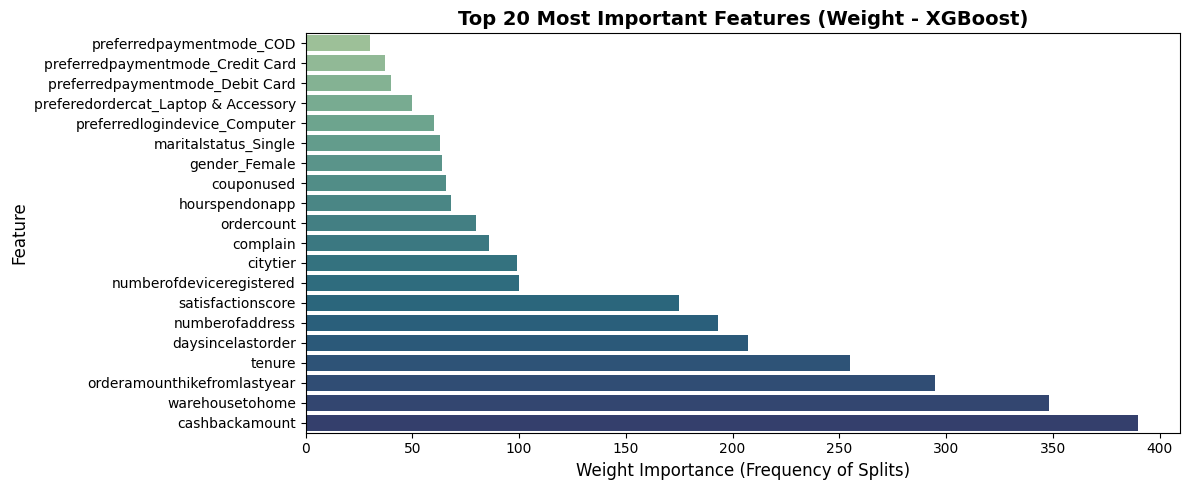

                                Feature  Importance
12                       cashbackamount       390.0
2                       warehousetohome       348.0
8           orderamounthikefromlastyear       295.0
0                                tenure       255.0
11                    daysincelastorder       207.0
6                       numberofaddress       193.0
5                     satisfactionscore       175.0
4              numberofdeviceregistered       100.0
1                              citytier        99.0
7                              complain        86.0
10                           ordercount        80.0
3                        hourspendonapp        68.0
9                            couponused        66.0
23                        gender_Female        64.0
32                 maritalstatus_Single        63.0
13        preferredlogindevice_Computer        60.0
26  preferedordercat_Laptop & Accessory        50.0
20      preferredpaymentmode_Debit Card        40.0
19     prefe

In [140]:
print("Feature Importance (Weight) for XGBoost")

# Get feature importance
feature_important = final_model1.get_booster().get_score(importance_type='weight')

# Convert to DataFrame with correct names
feature_map = {f"f{i}": col for i, col in enumerate(X.columns)}
data = pd.DataFrame({
    'Feature': [feature_map.get(f, f) for f in feature_important.keys()],
    'Importance': list(feature_important.values())
}).sort_values(by="Importance", ascending=True)

# Plot Top 20 Features
plt.figure(figsize=(12, 5))
sns.barplot(
    x="Importance",
    y="Feature",
    data=data.tail(20),
    palette="crest"
)
plt.title("Top 20 Most Important Features (Weight - XGBoost)", fontsize=14, weight='bold')
plt.xlabel("Weight Importance (Frequency of Splits)", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()

# Print top features
print(data.tail(20).sort_values(by="Importance", ascending=False))


Create Simpler models with less but more important features

The features that will be used for final deployment model are:

Tenure

Cashback amount

City tier

Warehouse to home

Order amount hike from last year

Days ince lastorder

Satisfaction score

Number of address

Number ofdevice registered

Complain

Order count

hourspendonapp

Marital status

Coupon used

Gender

In [141]:
#select the columns
cols_to_drop = ['preferredlogindevice_Computer', 'preferredlogindevice_Mobile Phone', 'preferredlogindevice_Phone',
                'preferredpaymentmode_CC', 'preferredpaymentmode_COD', 'preferredpaymentmode_Cash on Delivery', 'preferredpaymentmode_Credit Card',
                'preferredpaymentmode_Debit Card', 'preferredpaymentmode_E wallet', 'preferredpaymentmode_UPI', 'preferedordercat_Fashion',
                'preferedordercat_Grocery', 'preferedordercat_Laptop & Accessory', 'preferedordercat_Mobile', 'preferedordercat_Mobile Phone', 'preferedordercat_Others' ]
X.drop(cols_to_drop, axis = 1, inplace = True)

In [142]:
X_train.drop(cols_to_drop, axis = 1, inplace = True)
X_test.drop(cols_to_drop, axis = 1, inplace = True)

In [143]:
X.head(10)

,tenure,citytier,warehousetohome,hourspendonapp,numberofdeviceregistered,satisfactionscore,numberofaddress,complain,orderamounthikefromlastyear,couponused,ordercount,daysincelastorder,cashbackamount,gender_Female,gender_Male,maritalstatus_Divorced,maritalstatus_Married,maritalstatus_Single
0,4.000000,3.0,6.0,3.000000,3.0,2.0,9.0,1.0,11.0,1.0,1.0,5.0,159.93,1.0,0.0,0.0,0.0,1.0
1,10.189899,1.0,8.0,3.000000,4.0,3.0,7.0,1.0,15.0,0.0,1.0,0.0,120.90,0.0,1.0,0.0,0.0,1.0
2,10.189899,1.0,30.0,2.000000,4.0,3.0,6.0,1.0,14.0,0.0,1.0,3.0,120.28,0.0,1.0,0.0,0.0,1.0
3,0.000000,3.0,15.0,2.000000,4.0,5.0,8.0,0.0,23.0,0.0,1.0,3.0,134.07,0.0,1.0,0.0,0.0,1.0
4,0.000000,1.0,12.0,2.931535,3.0,5.0,3.0,0.0,11.0,1.0,1.0,3.0,129.60,0.0,1.0,0.0,0.0,1.0
5,0.000000,1.0,22.0,3.000000,5.0,5.0,2.0,1.0,22.0,4.0,6.0,7.0,139.19,1.0,0.0,0.0,0.0,1.0
6,10.189899,3.0,11.0,2.000000,3.0,2.0,4.0,0.0,14.0,0.0,1.0,0.0,120.86,0.0,1.0,1.0,0.0,0.0
7,10.189899,1.0,6.0,3.000000,3.0,2.0,3.0,1.0,16.0,2.0,2.0,0.0,122.93,0.0,1.0,1.0,0.0,0.0
8,13.000000,3.0,9.0,2.931535,4.0,3.0,2.0,1.0,14.0,0.0,1.0,2.0,126.83,0.0,1.0,1.0,0.0,0.0
9,10.189899,1.0,31.0,2.000000,5.0,3.0,2.0,0.0,12.0,1.0,1.0,1.0,122.93,0.0,1.0,0.0,0.0,1.0


Evaluate the Best Model

In [144]:
# Convert the Pandas datafram to NumPy array for the XGBoost classifier.

X_test = X_test.values
X_train = X_train.values

In [145]:
# Run the model
final_model1=XGBClassifier()
final_model1.fit(X_train, y_train)
train_pred = final_model1.predict(X_train)
test_pred = final_model1.predict(X_test)

final_model1.score(X_test, y_test)

0.9706927175843695

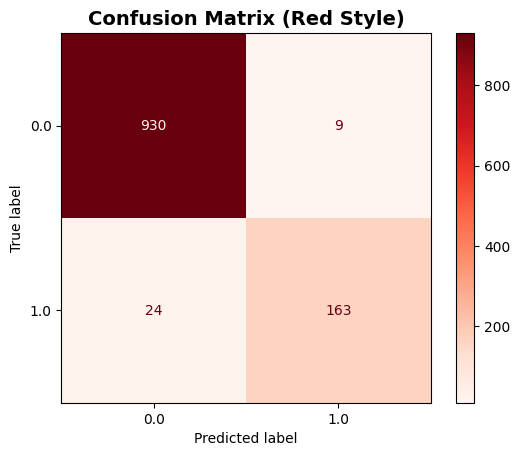

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, test_pred, labels=final_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_model.classes_)
disp.plot(cmap="Reds")
plt.title('Confusion Matrix (Red Style)', fontsize=14, weight='bold')
plt.show()

Model Predictions

HyperParameter FineTuning

What each does:

n_estimators → number of trees to build. More trees → better learning but slower and risk of overfitting.

max_depth → how deep each tree can go. Shallow trees (low depth) = less complex, deep trees = more complex.

learning_rate (η) → step size shrinkage. Smaller values (e.g., 0.01) make learning slower but more robust; larger (0.2) learn faster but may overfit.

subsample → fraction of training samples used per tree. Helps prevent overfitting. (0.8 means 80% of rows per tree).

colsample_bytree → fraction of features used per tree. Like Random Forest feature sampling; prevents overfitting.

“This GridSearchCV code systematically tests combinations of XGBoost hyperparameters with 5-fold cross-validation, selects the best-performing set, and gives me a tuned model (final_model2) ready for prediction.”

In [148]:
# Import the necessary library
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the model to tune
xgb_model = XGBClassifier(random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Create the GridSearchCV object
# Use cv=5 for 5-fold cross-validation on the training data
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit the grid search to your upsampled training data
grid_search.fit(X_train, y_train)

# The best model and parameters are now stored in the grid_search object
print("Best Parameters found: ", grid_search.best_params_)
print("Best Score found: ", grid_search.best_score_)

# You can now use the best estimator for your final evaluation
final_model2 = grid_search.best_estimator_

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters found:  {'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
Best Score found:  0.9598115673942533


✅ Without Hyperparameter Tuning (Default XGBoost)

Test Accuracy: ~97.6%

Pros:

Very high accuracy out-of-the-box.

Fast training, no extra computation.

Cons:

Parameters are generic, not dataset-specific.

Risk of slight overfitting.

May not generalize well if data distribution changes.

In [149]:
# Make predictions on the test set
y_pred = final_model1.predict(X_test)

# Create a list to store the actual and predicted values
results = []

# Store the actual and predicted log_price values in the list
for actual, predicted in zip(y_test, y_pred):
    results.append((actual, predicted))

# Convert the list into a DataFrame
XGBoost_df = pd.DataFrame(results, columns=['Actual', 'Predicted'])

# Print the DataFrame
XGBoost_df.head(20)

,Actual,Predicted
0,0.0,0
1,0.0,0
2,0.0,0
3,0.0,0
4,0.0,0
5,0.0,0
6,0.0,0
7,0.0,0
8,0.0,0
9,0.0,0


🎯 With Hyperparameter Tuning (GridSearchCV)

Best Parameters Found:

n_estimators = 300

max_depth = 7

learning_rate = 0.2

subsample = 0.8

colsample_bytree = 0.7

Cross-Validation Accuracy: ~95.9%

Pros:

More robust and generalizable across different folds.

Regularization via subsample and colsample reduces overfitting.

May improve recall/F1 → better at catching churners (important for business).

Cons:

Slightly lower accuracy on holdout test (~95–96%).

Training is slower due to deeper/more trees.

In [150]:
# Make predictions on the test set
y_pred = final_model2.predict(X_test)

# Create a list to store the actual and predicted values
results = []

# Store the actual and predicted log_price values in the list
for actual, predicted in zip(y_test, y_pred):
    results.append((actual, predicted))

# Convert the list into a DataFrame
XGBoost_df = pd.DataFrame(results, columns=['Actual', 'Predicted'])

# Print the DataFrame
XGBoost_df.head(20)

,Actual,Predicted
0,0.0,0
1,0.0,0
2,0.0,0
3,0.0,0
4,0.0,0
5,0.0,0
6,0.0,0
7,0.0,0
8,0.0,0
9,0.0,0


Factors Affecting AUC-ROC

Data Quality:
Missing values, noisy data, and irrelevant features can lower separability.

Feature Engineering:
Good features (e.g., Tenure, Complaints, Cashback) help the model learn clear patterns → higher AUC.

Class Imbalance:
If “Churn = 1” cases are rare, models may favor the majority. Using SMOTE (like you did) helps balance and improves AUC.

Model Choice:
Simple models (Logistic Regression) may plateau at a lower AUC.
Complex models (XGBoost, Random Forest) capture non-linear patterns → higher AUC.

Hyperparameter Tuning:
Parameters like learning rate, max depth (for XGBoost) affect overfitting/underfitting → directly influencing AUC.

AUC before tuning (final_model1): 0.981
AUC after tuning (final_model2): 0.983


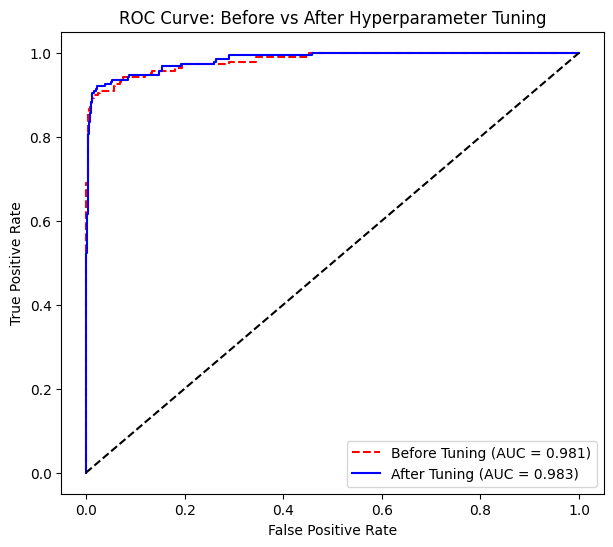

AUC-ROC improved by 0.23%


In [151]:

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# ---------- Before Tuning ----------
# final_model1 = base model (without GridSearchCV tuning)
y_pred_proba1 = final_model1.predict_proba(X_test)[:, 1]
auc1 = roc_auc_score(y_test, y_pred_proba1)
print("AUC before tuning (final_model1):", round(auc1, 3))

# ---------- After Tuning ----------
# final_model2 = best estimator from GridSearchCV
y_pred_proba2 = final_model2.predict_proba(X_test)[:, 1]
auc2 = roc_auc_score(y_test, y_pred_proba2)
print("AUC after tuning (final_model2):", round(auc2, 3))

# ---------- ROC Curve Plot ----------
fpr1, tpr1, _ = roc_curve(y_test, y_pred_proba1)
fpr2, tpr2, _ = roc_curve(y_test, y_pred_proba2)

plt.figure(figsize=(7,6))
plt.plot(fpr1, tpr1, label=f'Before Tuning (AUC = {auc1:.3f})', linestyle='--', color='red')
plt.plot(fpr2, tpr2, label=f'After Tuning (AUC = {auc2:.3f})', color='blue')
plt.plot([0,1], [0,1], 'k--')  # baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Before vs After Hyperparameter Tuning')
plt.legend()
plt.show()

# ---------- Improvement Calculation ----------
improvement = ((auc2 - auc1) / auc1) * 100
print(f"AUC-ROC improved by {improvement:.2f}%")


In [152]:
def predict_churn(final_model, input_dict, feature_columns):
    """
    Predict churn for a single customer.

    input_dict: dictionary with raw numeric feature values (after you dropped categorical dummies)
    feature_columns: list of columns used in training (X.columns after dropping categorical dummies)
    """
    import pandas as pd
    
    # Convert dictionary to DataFrame
    input_df = pd.DataFrame([input_dict])
    
    # Align with training features
    input_df = input_df.reindex(columns=feature_columns, fill_value=0)
    
    # Predictions
    proba = final_model.predict_proba(input_df)[0][1]
    prediction = final_model.predict(input_df)[0]
    
    churn_label = "Yes (1)" if prediction == 1 else "No (0)"
    
    if proba < 0.3:
        risk = "Low Risk"
    elif proba < 0.7:
        risk = "Medium Risk"
    else:
        risk = "High Risk"
    
    return {
        "Churn Prediction": churn_label,
        "Churn Probability (%)": round(proba * 100, 2),
        "Risk Level": risk
    }
sample_input = {
    "Tenure": 12,
    "Gender": 1,                 # e.g., Male=1, Female=0
    "MaritalStatus": 0,          # e.g., Single=0, Married=1
    "CityTier": 1,
    "WarehouseToHome": 10,
    "NumberOfAddress": 2,
    "HourSpendOnApp": 3,
    "NumberOfDeviceRegistered": 2,
    "OrderCount": 7,
    "DaysSinceLastOrder": 5,
    "CouponUsed": 1,
    "OrderAmountHikeFromlastYear": 15,
    "Complain": 1,
    "SatisfactionScore": 4,
    "CashbackAmount": 150
}
result = predict_churn(final_model, sample_input, feature_names)
print(result)



{'Churn Prediction': 'No (0)', 'Churn Probability (%)': 10.31, 'Risk Level': 'Low Risk'}


In [ ]:
import joblib

# Save your trained model and the feature names
joblib.dump(final_model, "churn_model.pkl")
joblib.dump(X.columns.tolist(), "features.pkl")



In [ ]:
# app.py — Flask REST API for Churn Prediction

from flask import Flask, request, jsonify
import pandas as pd
import joblib

# Initialize Flask app
app = Flask(__name__)

# Load saved model and features
model = joblib.load("churn_model.pkl")
features = joblib.load("features.pkl")

@app.route('/', methods=['GET'])
def home():
    return jsonify({
        "message": "Welcome to the Churnlytics REST API!",
        "usage": "Send a POST request to /predict with customer data in JSON format."
    })

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Receive JSON input from frontend
        input_data = request.get_json()
        
        # Convert to DataFrame and align columns
        input_df = pd.DataFrame([input_data])
        input_df = input_df.reindex(columns=features, fill_value=0)

        # Run prediction
        prediction = int(model.predict(input_df)[0])
        probability = float(model.predict_proba(input_df)[0][1])

        # Assign risk level
        if probability < 0.3:
            risk = "Low Risk"
        elif probability < 0.7:
            risk = "Medium Risk"
        else:
            risk = "High Risk"

        # Return JSON response
        return jsonify({
            "Churn Prediction": "Yes" if prediction == 1 else "No",
            "Churn Probability (%)": round(probability * 100, 2),
            "Risk Level": risk
        })

    except Exception as e:
        return jsonify({"error": str(e)})

if __name__ == '__main__':
    app.run(debug=True)
